## Project #1
## Create a Neural Network In Python

#1st: Import Statments

In [136]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import random
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.utils import np_utils

#2nd: Building Neural Network Model From Scratch

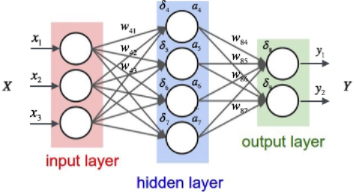

The neural network that i am building in this task will use sigmoid function as the source of non linearaity.

First, We need to initalize the weights randomly.

In [38]:
def init_params(feature_vector_size,number_of_layers,labels_number):
  '''
  Initialize parameters take the feature vector size to initalize the input layer with the first hidden layer.
  Input: number of layers - Number of hidden layers needed.
  Input: labels number - Number of labels
  Output: Multidimensoinal array, each row contains the weights for each neuron (the row is an array)
  '''
  weights=[]

  for i in range(number_of_layers):
        if i==0:
            w= input("Please enter number of neurons in the hidden layer: '\n'")
            w= int(w)
            W1 = np.random.randn(w, feature_vector_size)
            weights.append(W1)
        elif i==(number_of_layers-1):
            output = np.random.randn(labels_number, len(weights[i-1]))
            weights.append(output)
            break
        else:
            w= input("Please enter number of neurons in the hidden layer: '\n'")
            w= int(w)
            W1 = np.random.randn(w, len(weights[i-1]))
            weights.append(W1)
  return weights

Define sigmod and sigmod derivative

In [53]:
def sigmoid(Z):
  '''
  For any discrete value Z, perform the sigmoid of this discrete value. Sigmoid function makes the discrete value 
  between 0 and 1. The sigmoid function will be the source of non linearity in our code
  '''
  return  1/(1 + np.exp(-Z))

def sigmoid_deriv(z):
  '''
  Sigmoid derivative was defined at the lecture
  '''
  return sigmoid(z)*(1-sigmoid(z))

Normalization

In [54]:
def normalization(x):
  '''
  Perform normalization.
  Input: Vector
  Output: Normalized Vector
  '''
  sum=0
  for i in range(len(x)):
        sum+=x[i]
  for i in range(len(x)):
        x[i]=x[i]/sum
  return x

Now we need to implement forward propagation.

In [227]:
def forward_prop(weights,X):
  '''
  Input: Weights Array (The 2D Array) & The Feature Vector X.
  Output: Performing WjiX and Netj
  '''
  Z=[]
  A=[]
  Z.append(weights[0].dot(X))
  A.append(sigmoid(Z[0]))
  for i in range(1,len(weights)):
        Z.append(weights[i].dot(A[i-1]))
        A.append(sigmoid(Z[i]))
  A[len(weights)-1]=normalization(A[len(weights)-1])

  return Z,A

Now we need to perform Backward propagation.

In [296]:
def backward_prop(Z,A,weights,LearningFactor, X, Y):
  '''
  Inputs:
  Z: Net.j
  A: Oj
  Weights: Weights before update.
  LearningFactor: Eta
  X: Feature Vector
  Y: Label Vector
  output: Delta Weights (To be added to the current weight)
  '''
  dweights=[0] * (len(weights)) #Make array of the same length
  dZ=[0] * (len(weights)) #Make array of the same length
    
    #output layer
  error=Y-A[len(weights)-1]
  dZ[(len(weights)-1)]=error*sigmoid_deriv(Z[len(weights)-1])
  dweights[(len(weights)-1)]=LearningFactor* dZ[(len(weights)-1)].dot(A[(len(weights)-1)-1].T)     
    #all hidden layers except the first one
  for i in range((len(weights)-2),0,-1):
      dZ[i]=weights[i+1].T.dot(dZ[i+1]) * sigmoid_deriv(Z[i])  
      dweights[i]=LearningFactor * dZ[i].dot(A[i-1].T)
        
    #the first hidden layer
  dZ[0]=weights[1].T.dot(dZ[1]) * sigmoid_deriv(Z[0])  
  dweights[0]=LearningFactor * dZ[0].dot(X.T)
  return dweights

Now we need to update the paramters (New weights)

In [164]:
def update_params(weights,dweights):
  '''
  Inputs:
  Weights: Current Weights
  Dweights: The value to add to the current weights
  Output: Updated Weights
  '''
  for i in range(len(weights)):
      weights[i]=weights[i]+dweights[i]
  return weights

A function to make predections using given weight

In [59]:
def make_predictions(X, weights):
  '''
  Inputs:
  1-Feature Vector
  2- Weights
  Output: Predicted Values
  '''
  Z,A = forward_prop(weights, X)
  return A[len(weights)-1]

Apply one hot encoder to the Output vector

In [73]:
def make_one_hot_encoder(Y):
  '''
  Input: Label Y
  Output: One hot encoded Y vector
  '''
  Y=np_utils.to_categorical(Y)
  return Y

A Function to calculate the accuracy of the model

In [68]:
def get_accuracy(actual, predicted1):
  '''
  '''
  correct = 0
  predicted=[]
  for i in range(len(predicted)):
        if actual[i] == predicted[i]:
            correct += 1
  return correct / float(len(actual)) * 100.0

In [67]:
def MSE(actual,predicted):
  '''
  Calculate Mean Square Error
  '''
  sum = 0  
  n = len(actual) 
  for i in range (0,n):  
      difference = actual[i] - predicted[i]  
      squared_difference = difference**2  
      sum = sum + squared_difference  
  MSE = sum/n  
  return MSE

In [297]:
def training_fit(X, Y, hidden_layers,LearningFactor,iterations,feature_vector_size,label_size):
  '''
  Inputs:
  X: Feature Vector
  Y: Label Vector
  Hidden_Layers: Number of hidden Layers you wish
  Learning Factor: Learning Factor value for NN training
  iterations: Number of iterations to stop after
  '''
  weights = init_params(feature_vector_size,hidden_layers,label_size)

  actual=[]
    
    
  for j in range(iterations):
        print("Iteration: ",j)
        predictions=[]
        error=0
        for i in range(len(X)):
            Z,A = forward_prop(weights, X[i])
            error+=MSE(A[len(weights)-1],Y[i])
            dweights= backward_prop(Z,A,weights, LearningFactor,X[i], Y[i])
            weights = update_params(weights,dweights)
            predictions.append(make_predictions(X[i],weights))
        print("Error: ",error/len(X))
       # print("Training Accuracy: ",get_accuracy(actual,predictions)," %")
  return weights

## Test your model on IRIS  dataset and MNIST Dataset

First: MNIST Dataset

In [244]:
(x_train,y_train) , (x_test ,y_test) = keras.datasets.mnist.load_data() #Loading Dataset

In [245]:
x_train = x_train[:1000,:,:]
x_test = x_test[:100,:,:]
y_train = y_train[:1000]
y_test  = y_test[:100]

print(x_train.shape)

(1000, 28, 28)


In [246]:
#Apply One hot encoding to the Data
y_train = make_one_hot_encoder(y_train)
y_test = make_one_hot_encoder(y_test)

y_train = y_train.reshape(y_train.shape[0],10)
y_train = y_train.astype('float32')

y_test = y_test.reshape(y_test.shape[0],10)
y_test = y_test.astype('float32')

x_train = x_train.reshape(x_train.shape[0], 28*28)
x_train = x_train.astype('float32')

x_test = x_test.reshape(x_test.shape[0], 28*28 )
x_test = x_test.astype('float32')
print(y_train.shape)

(1000, 10)


In [299]:
numberOf_layers=2
weights= training_fit(x_train, y_train, numberOf_layers,2,30,784,10)  
       

Please enter number of neurons in the hidden layer: '
'100
Iteration:  0


<ipython-input-53-c9b2d35a67b7>:6: RuntimeWarning: overflow encountered in exp
  return  1/(1 + np.exp(-Z))


ValueError: ignored

## Refrence
https://becominghuman.ai/understanding-neural-networks-2-the-math-of-neural-networks-in-3-equations-6085fd3f09df
https://towardsdatascience.com/how-to-define-a-neural-network-as-a-mathematical-function-f7b820cde3f
